# K Nearest Neighbors with Python

I have been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

I'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.


## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Getting the Data

** Reading the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [4]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

**Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

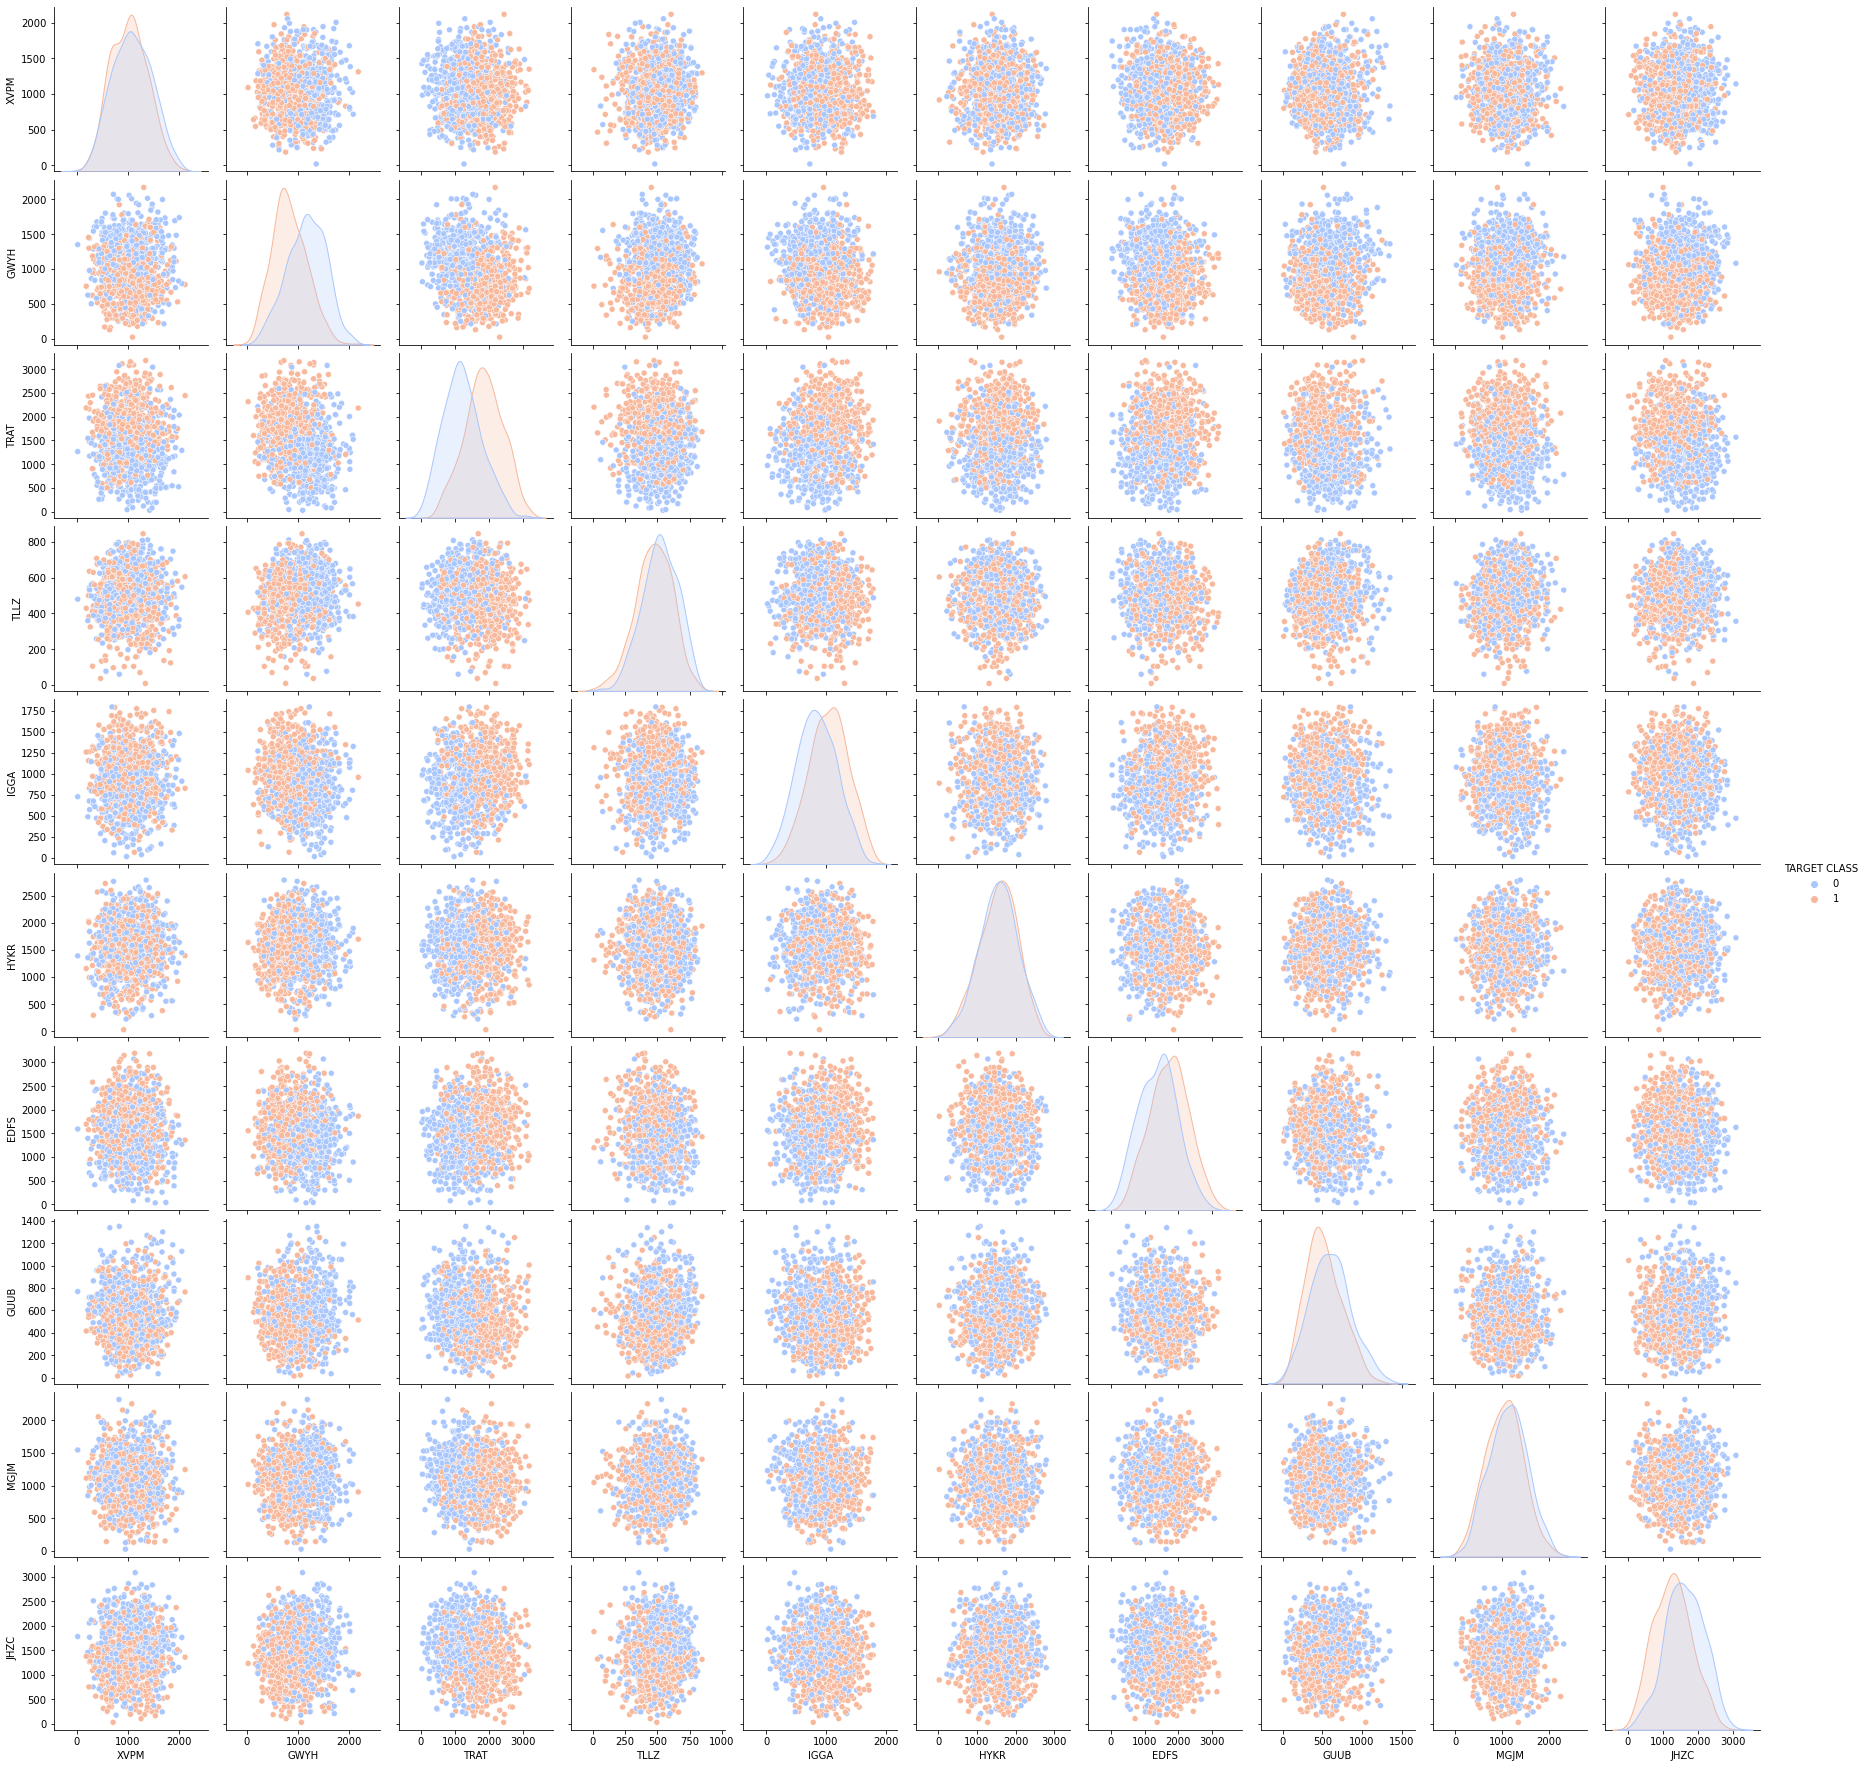

In [5]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardizing the Variables

Time to standardize the variables.

**Importing StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

**Fitting scaler to the features.**

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Converting the scaled features to a dataframe**

In [16]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Using train_test_split to split your data into a training set and a testing set.**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# Using KNN

**Importing KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitting this KNN model to the training data.**

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Evaluating the KNN model!

**Using the predict method to predict values using your KNN model and X_test.**

In [23]:
predictions = knn.predict(X_test)

**Creating a confusion matrix and classification report.**

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predictions))

[[107  37]
 [ 39 117]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       144
           1       0.76      0.75      0.75       156

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



# Choosing a K Value

Using the elbow method to pick a good K Value!

**Creating a for loop that trains various KNN models with different k values.**

In [27]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

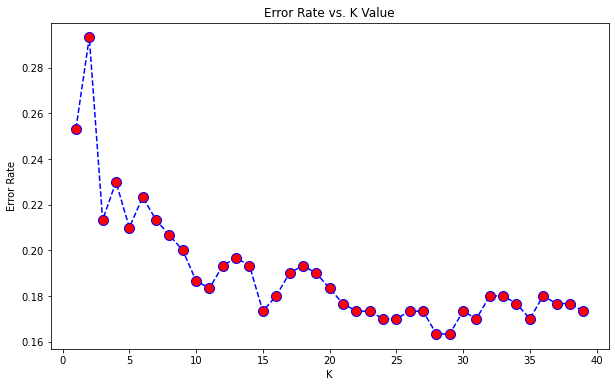

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

*Choosing K=25 as best value for the model* 

## Retraining with new K Value

**Retraining model with the best K value and repeating the classification report and the confusion matrix.**

In [33]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=25


[[114  30]
 [ 21 135]]


              precision    recall  f1-score   support

           0       0.84      0.79      0.82       144
           1       0.82      0.87      0.84       156

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



***Quite good precision with K=25 as compared to K=1.***